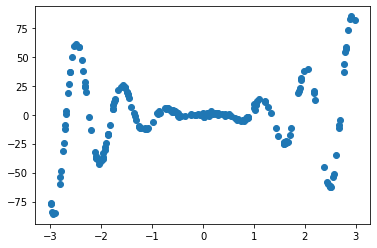

In [82]:
import random
import matplotlib.pyplot as plt

filename = 'data/data-gp1.txt'
# filename = 'data/data-gp2.txt'

x_list = []
y_list = []

with open(filename, 'r') as f:
    for line in f:
        x, y = line.split(',')
        x_list.append(float(x))
        y_list.append(float(y))

plt.scatter(x_list, y_list)

In [129]:
def fitness_function(x_list, y_list, individual):
    fitness = 0
    
    for i in range(len(x_list)):
        score = 0
        for n, j in enumerate(individual):
            score += j * x_list[i] ** n
        fitness += abs(score - y_list[i])
                   
    return fitness
                   
                   
def initialize():
    population = []
    
    for _ in range(500):
        individual = []
        for _ in range(10):
            individual.append(random.gauss(0,0.1))
        population.append(individual)
        
    return population

In [130]:
import copy
import numpy as np

cross_over_p = 0.9
mutation_p = 0.01
generation_iter = 500
population_size = 500


def tournament(fitness, population):
    new_population = []
    
    for index, individual in enumerate(population):
        x = random.randint(0, population_size - 1)
        if fitness(x_list, y_list, individual) < fitness(x_list, y_list, population[x]):
            new_population.append(copy.deepcopy(individual))
        else: 
            new_population.append(copy.deepcopy(population[x]))
            
    return new_population


def crossover(population):
    random.shuffle(population)
    half = len(population) // 2
    for i in range(half):
        if random.random() < cross_over_p:
            for _ in range(3):  # 3 points
                pos = random.randint(0, len(population[i]) - 1) + 1
                tmp_i_l = copy.deepcopy(population[i][:pos])
                tmp_n_l = copy.deepcopy(population[i + half][:pos])
                tmp_i_u = copy.deepcopy(population[i][pos:])
                tmp_n_u = copy.deepcopy(population[i + half][pos:])

                population[i] = tmp_i_l + tmp_n_u
                population[i + half] = tmp_n_l + tmp_i_u
    return population


def elitism(fitness, population, T):
    fitness_scores = [fitness(x_list, y_list, i) for i in population]
    min_index, max_index = np.argsort(fitness_scores)[:T], np.argsort(fitness_scores)[-T:]
    for i in range(T):
        population[max_index[i]] = copy.deepcopy(population[min_index[i]])
    return population

                                  
def mutation(population):
    for index, individual in enumerate(population):
        temp = copy.deepcopy(individual)
        for i in range(len(individual)):
            if random.random() < mutation_p:
                temp[i] = random.gauss(0,1)
        population[index] = temp
    return population
                           

def evaluation(fitness, population, x_list, y_list):
    return sum([fitness(x_list, y_list, i) for i in population]) / population_size

                                  
def best_sample(fitness, population, x_list, y_list):
    return min([fitness(x_list, y_list, i) for i in population])

In [131]:
population = initialize()

for i in range(generation_iter):
    temp_p = tournament(fitness_function, population)
    temp_p = crossover(temp_p)
    temp_p = elitism(fitness_function, temp_p, 10)
    population = mutation(temp_p)
    

    print(f'Gen {i+1:>3d}: avg - {evaluation(fitness_function, population, x_list, y_list):.3f}, best - {best_sample(fitness_function, population, x_list, y_list):.3f}')

Gen   1: avg - 24654.608, best - 3362.193
Gen   2: avg - 21072.202, best - 3345.385
Gen   3: avg - 17164.397, best - 3283.326
Gen   4: avg - 13733.151, best - 3270.125
Gen   5: avg - 15374.075, best - 3268.343
Gen   6: avg - 11698.782, best - 3267.943
Gen   7: avg - 9814.841, best - 3270.464
Gen   8: avg - 10377.448, best - 3267.060
Gen   9: avg - 8705.704, best - 3263.186
Gen  10: avg - 9298.417, best - 3258.376
Gen  11: avg - 9720.308, best - 3252.657
Gen  12: avg - 6459.820, best - 3253.906
Gen  13: avg - 7491.069, best - 3253.906
Gen  14: avg - 6223.508, best - 3253.029
Gen  15: avg - 9384.878, best - 3251.660
Gen  16: avg - 6650.094, best - 3250.734
Gen  17: avg - 9312.648, best - 3247.939
Gen  18: avg - 10494.685, best - 3247.939
Gen  19: avg - 12145.127, best - 3247.570
Gen  20: avg - 8104.561, best - 3247.570
Gen  21: avg - 7337.917, best - 3247.201
Gen  22: avg - 7876.874, best - 3247.459
Gen  23: avg - 8730.935, best - 3246.877
Gen  24: avg - 14269.042, best - 3246.578
Gen  2